# Задача 1
## Неравностоящие узлы

In [1]:
# def calc_div_diff(values, nodes, n, i):
#     # рекурсивно вычисляем р-р порядка n (i - последний индекс)
#     if n == 0: return values[0]
#     elif n == 1: return (values[i] - values[i - 1]) / (nodes[i] - nodes[i - 1])
#     numerator = calc_div_diff(values, nodes, n - 1, i) - calc_div_diff(values, nodes, n - 1, i - 1)
#     return numerator / (nodes[i] - nodes[i - n])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
import pandas as pd
from math import factorial

class NewtonInterpolation(object):
    def __init__(self, x, y):
        self.x = np.array(x).astype(float)
        self.y = np.array(y).astype(float)
        self.n = len(x)
        self.coefs = self.calculate_coefs2()
        self.coefs_check = self.calculate_coefs()
        assert (self.coefs == self.coefs_check).all() # ну чтоб уж точно

    def calculate_coefs(self):
        a = self.y.copy()
        for j in range(1, self.n):
            for i in range(self.n - 1, j - 1, -1):
                a[i] = (a[i] - a[i - 1]) / (self.x[i] - self.x[i - j])
        return a

    def evaluate(self, r):
        temp = self.coefs[self.n - 1]
        for i in range(self.n - 2, -1, -1 ):
            temp = temp * ( r - x[i] ) + self.coefs[i]
        return temp

    def plot(self):
        fig, ax= plt.subplots()
        ax.scatter(self.x, self.y, c='g')
        # делаем сто точек от минимального до максимального значения (на равных расстояниях)
        def_area = np.linspace(self.x.min(), self.x.max(), 100)
        ax.plot(def_area, self.evaluate(def_area), c='r')
        ax.grid(True)
        plt.show()
        
    def calculate_coefs2(self):
        x = self.x
        y = self.y
        n = np.shape(y)[0]
        pyramid = np.zeros([n, n])
        pyramid[::,0] = y
        for j in range(1,n):
            for i in range(n-j):
                pyramid[i][j] = (pyramid[i+1][j-1] - pyramid[i][j-1]) / (x[i+j] - x[i])
        return pyramid[0] 

In [3]:
def get_closest(arr, target, point, num_closest):
    arr = np.array(arr)
    dists = np.abs(arr - point)
    sort = sorted(list(zip(dists, range(len(arr)))), key=lambda x: x[0])
    inds = [sort[i][1] for i in range(num_closest)]
    x = [arr[i] for i in inds]
    y = [target[i] for i in inds]
    return list(x), list(y)

def f(x):
    return np.sin(x)

In [4]:
# sin derivatives
first_deriv = lambda x: np.cos(x)
second_deriv = lambda x: -np.sin(x)
third_deriv = lambda x: -np.cos(x)
forth_deriv = lambda x: np.sin(x)
fifth_deriv = lambda x: np.cos(x)
derivs = [first_deriv, second_deriv, third_deriv, forth_deriv, fifth_deriv]

In [5]:
eval_point = -0.4
# setattr(newton, 'get_closest', get_closest)

In [6]:
for i in range(4):
    x = np.array([-0.6, -0.5, -0.3, -0.2, 0, 0.2]) # points
    y = np.array([f(i) for i in x]) # f(x) for each point
    x, y = get_closest(x, y, eval_point, i + 1) # closest i + 1 points

    x_ = np.array(x + [eval_point]) # interval [c, d]
    
    assert len(x) == i + 1, (len(x), i + 1) # check that we actually have i + 1 nodes
    def_area = np.linspace(x_.min(), x_.max(), 10000) # interval where function is defined
    deriv_values = [np.abs(derivs[i](j)) for j in def_area] # deriv_i values for given interval [c, d]
    differences_prod = np.prod(eval_point - np.array(x)) # product (eval_point - x_0)(eval_point - x_1) ...
    
    upper_bound = np.abs(differences_prod) * max(deriv_values) / factorial(i + 1)
    print('Theoretical_R_{}:'.format(i + 1), upper_bound)

Theoretical_R_1: 0.0921060994002885
Theoretical_R_2: 0.0023971276930210153
Theoretical_R_3: 0.000318445496375202
Theoretical_R_4: 9.410707889917257e-06


In [7]:
for i in range(1, 5): # берем 1-4 точки 
    x = np.array([-0.6, -0.5, -0.3, -0.2, 0, 0.2])
    y = np.array([f(i) for i in x])
    x, y = get_closest(x, y, eval_point, i)
    # строим ньютона
    newton = NewtonInterpolation(x, y)
    # считаем значение многочлена в точке
    ev_res = newton.evaluate(eval_point)

    print('R_{}:'.format(i - 1), np.abs(ev_res - f(eval_point))) # |R_i|

R_0: 0.09000719629555248
R_1: 0.001945469675879219
R_2: 0.00029977405098718934
R_3: 6.479496638234217e-06


In [8]:
# коэф-ты. 
newton.coefs

array([-0.47942554,  0.91952666,  0.22452437, -0.15312677])

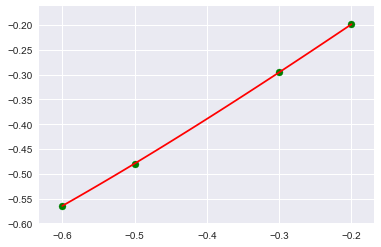

In [9]:
# графичек
newton.plot()

## Равностоящие узлы

In [10]:
def fin_differences(y, n, first):
    fdiffs = [y]
    for cur_n in range(n):
        cur_diffs = []
        for i in range(1, len(y) - cur_n):
            cur_diffs.append(fdiffs[-1][i] - fdiffs[-1][i-1])
        fdiffs.append(cur_diffs)
    if first: return [fdiffs[i][0] for i in range(len(fdiffs))]
    return fdiffs

In [11]:
def f(x): return np.sin(x)

def get_Nk(t, k):
    if k == 0: return 1
    return get_Nk(t, k - 1) * (t - k + 1) / k

def get_Pk(deltas_y0, t, max_k):
    Nks = [get_Nk(t, k) for k in range(max_k + 1)]
    assert len(deltas_y0) == len(Nks), (len(Nks), len(deltas_y0))
    return sum([q * m for q, m in zip(deltas_y0, Nks)])

In [12]:
# interval = [0.5, 1.5]
a = 0.5
b = 1.5
h = 0.1
x = np.linspace(a, b, int((b - a) / h)  + 1)
y = [f(_x) for _x in x]
eval_point = 0.55 
# используем начало таблицы т к a < 0.55 < a + h/2

In [13]:
n = 4
t = (eval_point - a) / h
# считаем основные показатели
matrix = np.zeros(shape=(n + 1, 6))
for k in range(n + 1):
    # считаем разности 
    deltas_y0 = fin_differences(y, k, True)
    delta_k_y0 = deltas_y0[-1]
    
    Nk = get_Nk(t, k)
    Nk_delta_k_y0 = Nk * delta_k_y0
    
    Pk = get_Pk(deltas_y0, t, k)
    
    # считаем оценку погрешности
    def_area = np.linspace(a, a+k*h, 10000) # interval where function is defined
    M_k_plus_1 = max([np.abs(derivs[k](x)) for x in def_area])
    N_k_plus_1 = get_Nk(t, k + 1)
    th_R = np.abs(N_k_plus_1) * M_k_plus_1 * h ** (k + 1)
    # записываем в матрицу
    matrix[k] = np.array([delta_k_y0, Nk, Nk_delta_k_y0, Pk, f(eval_point) - Pk, th_R])

In [14]:
index = ['∆k*y0', 'N_k(t)', 'N_k*∆k*y0',
            f'P_k({eval_point})', f'f({eval_point}) - P_k({eval_point})',
            f'|R_k({eval_point})| <=']
pd.DataFrame(matrix.T, index=index)

,0,1,2,3,4
∆k*y0,0.479426,0.085217,-0.005642,-0.000795,6.431448e-05
N_k(t),1.000000,0.500000,-0.125000,0.062500,-3.906250e-02
N_k*∆k*y0,0.479426,0.042608,0.000705,-0.000050,-2.512284e-06
P_k(0.55),0.479426,0.522034,0.522739,0.522690,5.226870e-01
f(0.55) - P_k(0.55),0.043262,0.000653,-0.000052,-0.000002,2.131739e-07
|R_k(0.55)| <=,0.043879,0.000706,0.000055,0.000003,2.399640e-07


# Задача 2

In [15]:
import sympy as sp
from sympy import re, diff, Eq
from sympy.plotting import plot_implicit

In [16]:
def f(x): return np.sin(x)

x = np.array([-0.6, -0.5, -0.3, -0.2, 0, 0.2])
y = np.array([f(i) for i in x])
eval_point = -0.4
x, y = get_closest(x, y, eval_point, 6) # построим многочлен 5й степени

newton = NewtonInterpolation(x, y)
newton.coefs

array([-0.47942554,  0.91952666,  0.22452437, -0.15312677, -0.01305764,
        0.00806382])

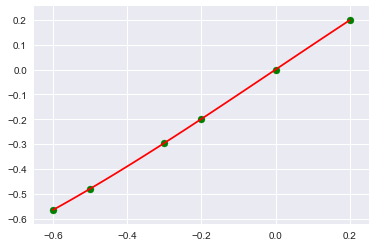

In [17]:
newton.plot()

In [18]:
_x = sp.symbols('x')

def get_newton_sp(x, y, _x, coefs):
    # получаем многочлен ньютона в sympy (посчитанный ранее)
    polynom = coefs[0]
    prod = (_x - x[0])
    for i in range(1, len(coefs)):
        polynom += prod * coefs[i]
        prod *= _x - x[i]
    return polynom

poly = get_newton_sp(x, y, _x, newton.coefs)

In [19]:
true_value = -0.56
true_point = np.arcsin(-0.56)

In [20]:
roots = [root for root in sp.solve(true_value - poly) if  min(x) <= re(root) <= max(x)]
assert len(roots) == 1 # иначе имеем больше одного корня на промежутке
root = float(roots[0])
estimation = float(poly.subs({_x : root}))

In [21]:
pd.DataFrame([true_point, root, root - true_point, true_value, estimation],
             index=['true point', 'root', 'error', 'true value', 'estimation'], columns=[''])

,
true point,-5.943858e-01
root,-5.943858e-01
error,-1.362085e-08
true value,-5.600000e-01
estimation,-5.600000e-01


# Задача 3

In [22]:
# функция рунге
def f(x): return 1/(1 + x**2)

eval_point = 0.15
n = 7
x = [np.cos(np.pi * (2 * k + 1) / (2 * n)) for k in range(n)]
y = [f(i) for i in x]

In [23]:
# по неравностоящим узлам
x, y = get_closest(x, y, eval_point, n) # построим многочлен (n-1)й степени по ближайшим n точкам
newton = NewtonInterpolation(x, y)
newton.coefs

array([ 1.        , -0.3651436 , -0.84157013,  0.40835485,  0.06367081,
       -0.26106856, -0.26778243])

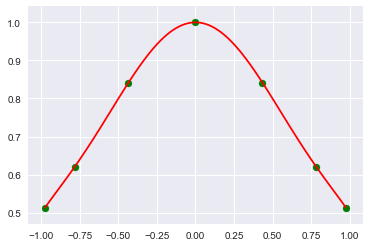

In [24]:
newton.plot()

In [25]:
pd.DataFrame({'eval': [newton.evaluate(eval_point)],
              'Runge': [f(eval_point)],
              'error': [np.abs(newton.evaluate(eval_point) - f(eval_point))]})

,eval,Runge,error
0,0.978529,0.977995,0.000534


In [26]:
# по равностоящим узлам
a = -1
b = 1
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
y = [f(i) for i in x]
t = (eval_point -  get_closest(x, y, eval_point, 1)[0][0]) / h

In [27]:
deltas_y0 = fin_differences(y, n - 1, first=False)
deltas_y0 = [deltas_y0[k][3 - k // 2] for k in range(n)]

Nks = [1]
for i in range(1, n):
    Nks.append(Nks[-1] * (t - (-1)**i * (i // 2)) / i)

estimation = sum([q * m for q, m in zip(Nks, deltas_y0)])
estimation

0.9782456581129807

In [28]:
pd.DataFrame({'eval': [estimation],
              'Runge': [f(eval_point)],
              'error': [np.abs(estimation - f(eval_point))]})

,eval,Runge,error
0,0.978246,0.977995,0.000251


# Задача 4

In [29]:
def divided_diffs(nodes, values, max_order, first=True):
    diffs = [values]
    for order in range(max_order):
        current_diffs = []
        for i in range(1, len(nodes) - order):
            try:
                current_diffs.append((diffs[-1][i] - diffs[-1][i-1]) / (nodes[i + order] - nodes[i-1]))
            except ZeroDivisionError:
                #print('deriv', derivatives[order + 1][i - 1] / factorial(order), i, order)
                current_diffs.append(derivatives[order + 1][i] / factorial(order + 1))
        diffs.append(current_diffs)
    if first: return [diffs[i][0] for i in range(len(diffs)) if diffs[i]]
    return diffs

In [30]:
x = [-1, 0] * 3
y = [2, -2] * 3
dy = [3, 3] * 3
d2y = [6, -8] * 3
# везде третий порядок 

In [31]:
inds = [m[0] for m in sorted(zip(range(len(x)), x), key=lambda x: x[1])]

x = [x[i] for i in inds]
y = [y[i] for i in inds]
dy = [dy[i] for i in inds]
d2y = [d2y[i] for i in inds]

derivatives = [y, dy, d2y]

In [32]:
coefs =  divided_diffs(x, y, 5)
poly = get_newton_sp(x, y, _x, coefs)
poly

-49.0*x**2*(x + 1)**3 + 24.0*x*(x + 1)**3 + 3.0*x - 10.0*(x + 1)**3 + 3.0*(x + 1)**2 + 5.0

In [33]:
# проверка точек 
print('P(-1):', poly.subs({_x: -1}))
print('P(0):', poly.subs({_x: 0}))

P(-1): 2.00000000000000
P(0): -2.00000000000000


In [34]:
# проверка производных
print('dy0:', diff(poly).subs({_x: -1}))
print('d2y0:', diff(diff(poly)).subs({_x: -1}))
print('dy1:', diff(poly).subs({_x: 0}))
print('d2y1:', diff(diff(poly)).subs({_x: 0}))

dy0: 3.00000000000000
d2y0: 6.00000000000000
dy1: 3.00000000000000
d2y1: -8.00000000000000


# Задача 5

## 1

$$f'(x_i) = \frac{y_{i+1} - y_i}{h} + O(h)$$ – формула **(1а)**


$$f'(x_i) = \frac{y_{i+1} - y_{i-1}}{2h} + O(h^2)$$ – формула **(3а)**

$$f''(x_i) = \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} + O(h^2)$$ – формула **(6a)**

In [35]:
f = lambda x: np.exp(2 * x)
a = 0
b = 2
h = 0.1 
eval_point = 1.0
x = np.linspace(a, b, int((b - a) / h + 1))
y = [f(i) for i in x]

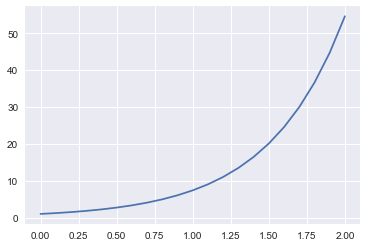

In [36]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

In [37]:
def first_order_deriv_1(x, y, h):
    return np.array([(y[i] - y[i - 1]) / h for i in range(1, len(x))] + [0])

def first_order_deriv_2(x, y, h):
    return np.array([0] + [(y[i] - y[i - 2]) / (2*h) for i in range(2, len(x))] + [0])

def second_order_deriv(x, y, h):
    return np.array([0] + [(y[i+1] - 2 * y[i] + y[i - 1]) / (h ** 2)
                           for i in range(1, len(x) - 1)] + [0])

def true_first_order_deriv(x):
    # (exp(2x))' = 2 * exp(2x)
    return np.array([2 * np.exp(2 * p) for p in x])

def true_second_order_deriv(x):
    return np.array([4 * np.exp(2 * p) for p in x])

In [38]:
def compute(x, y, h, return_df=True):
    fod_values_1 = first_order_deriv_1(x, y, h)
    fod_values_2 = first_order_deriv_2(x, y, h)
    sod_values_2 = second_order_deriv(x, y, h)
    td_values_1 = true_first_order_deriv(x)
    td_values_2 = true_second_order_deriv(x)
    # O(h)
    error_1 = td_values_1 - fod_values_1
    # O(h^2)
    error_2 = td_values_1 - fod_values_2
    # O(h^2)
    second_error_2 = td_values_2 - sod_values_2

    df_dict = {'x': x, 'f(x)': y, "f'": td_values_1, "~f'": fod_values_1, "O(h)": error_1,
               "~~f'": fod_values_2, "O(h^2)": error_2, 'f"': td_values_2, '~f"': sod_values_2,
               'O(h^2)_2': second_error_2 }
    
    df = pd.DataFrame(df_dict).iloc[1:-1]
    if return_df:
        return df
    # возвращаем только нужную ошибку для eval_point
    return df[df.x == eval_point].iloc[0]['O(h^2)']

In [39]:
compute(x, y, h)

,x,f(x),f',~f',O(h),~~f',O(h^2),"f""","~f""",O(h^2)_2
1,0.1,1.221403,2.442806,2.704219,-0.261414,2.459123,-0.016318,4.885611,4.901918,-0.016307
2,0.2,1.491825,2.983649,3.302941,-0.319292,3.003580,-0.019931,5.967299,5.987216,-0.019918
3,0.3,1.822119,3.644238,4.034221,-0.389984,3.668581,-0.024344,7.288475,7.312803,-0.024327
4,0.4,2.225541,4.451082,4.927409,-0.476327,4.480815,-0.029733,8.902164,8.931877,-0.029713
5,0.5,2.718282,5.436564,6.018351,-0.581787,5.472880,-0.036316,10.873127,10.909419,-0.036292
6,0.6,3.320117,6.640234,7.350830,-0.710597,6.684591,-0.044357,13.280468,13.324795,-0.044327
7,0.7,4.055200,8.110400,8.978325,-0.867925,8.164578,-0.054178,16.220800,16.274941,-0.054141
8,0.8,4.953032,9.906065,10.966150,-1.060086,9.972237,-0.066173,19.812130,19.878258,-0.066129
9,0.9,6.049647,12.099295,13.394086,-1.294791,12.180118,-0.080823,24.198590,24.279359,-0.080770
10,1.0,7.389056,14.778112,16.359574,-1.581462,14.876830,-0.098718,29.556224,29.654877,-0.098652


## 2

In [40]:
factor = 1.0 # фактор для h (уменьшаем в 2 раза постепенно)
min_error = float('inf') # минимальная полученная ошибка
iters = 0 # счетчик итераций
limit = 100 # максимальное число итераций
while iters < limit:
    iters += 1
    # update data
    x = np.linspace(a, b, int((b - a) / (h * factor) + 1))
    y = [f(i) for i in x]
    # calculate O(h^2) error for 3rd formula
    cur_error = np.abs(compute(x, y, h * factor, False)) # получаем O(h^2) для точки eval_point

    if cur_error < min_error:
        min_error = cur_error
        # update factor
        factor *= 0.5
        continue
    # if current error is greater than minimum error – break
    break
    
print('Ошибка {} получена после {} итераций'.format(min_error, iters))
print('Получившийся шаг {}'.format(h * factor))

Ошибка 1.8811974200616532e-10 получена после 17 итераций
Получившийся шаг 1.52587890625e-06


## 3

In [41]:
f = lambda x: np.exp(2 * x)
a = 0
b = 2
h = 0.1 
eval_point = 1.0
x = np.linspace(a, b, int((b - a) / h + 1))
y = [f(i) for i in x]
x, y = get_closest(x, y, eval_point, 4)
newton = NewtonInterpolation(x, y)
newton.coefs

array([ 7.3890561 , 13.39408635, 14.8274383 ,  8.95919525])

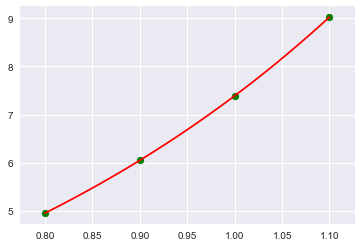

In [42]:
newton.plot()

In [43]:
_x = sp.symbols('x')

def get_newton_sp(x, y, _x, coefs):
    # получаем многочлен ньютона в sympy (посчитанный ранее)
    polynom = coefs[0]
    prod = (_x - x[0])
    for i in range(1, len(coefs)):
        polynom += prod * coefs[i]
        prod *= _x - x[i]
    return polynom

poly = get_newton_sp(x, y, _x, newton.coefs)

In [44]:
# настоящее значение производной приведено в таблице выше (eval_point = 1)
diff(poly).subs({_x: eval_point})

14.7872382226294

# Задача 6

## 1


$$\int_0^1 cos(x)\sqrt{x}dx \approx 0.531203$$ – wolfram

## 2


In [45]:
f = lambda p: np.cos(p) * np.sqrt(p)
a = 0
b = 1
N = 1 # 2N + 1 – количество узлов (=3)
h = (b - a) / (2 * N)
x = np.linspace(a, b, int((b - a) / h) + 1)
y = [f(p) for p in x]

In [46]:
simpson3nodes = (b - a) / (6*N) * (y[0] + 4 * y[1] + y[2])
simpson3nodes

0.5037467713538537

## 3

In [47]:
# считаем моменты
f = lambda m: np.cos(m)
p = lambda m: np.sqrt(m)
x = [0, 0.5, 1]
y = [f(p) for p in x]
# wolfram
mu0 = 0.6667
mu1 = 0.4
mu2 = 0.28571
# wolfram
A1 = 0.03812
A2 = 0.45716
A3 = 0.17142

weighted_interpolation = sum([q * m for q, m in zip([A1, A2, A3], y)])
weighted_interpolation

0.5319342652657193


## 4

In [48]:
n = 2 # будет 2 узла

In [49]:
def Legendre(n):
    if n == 0: return 1
    if n == 1: return _x
    return (2*n - 1)/n * _x * Legendre(n-1) - (n-1)/n * Legendre(n-2)

def getAk(k, poly):
    return 2 * (1 - t[k]**2) / (n**2 * poly.subs({_x: t[k]})**2)

In [50]:
t = sp.solve(Legendre(n))
poly = Legendre(n - 1)
Ak = [getAk(k, poly) for k in range(n)]
Ak, t

([1.00000000000000, 1.00000000000000], [-0.577350269189626, 0.577350269189626])

In [51]:
new_x = [(b - a) / 2 * t[k] + (b + a)/ 2 for k in range(len(t))]
gauss = (b - a) / 2 * sum([q*m for q, m in zip(Ak, new_x)]) 
print(gauss)

0.500000000000000


## 5

In [52]:
mu3 = 0.0625
a0 = -1.85777
a1 = 2.38217
w = _x ** 2 + a1 * _x + a0

roots = sp.solve(w)

A1 = 0.00350692
A2 = 0.663193
y = [f(float(m)) for m in roots]

gauss_type_two_nodes = sum([q * m for q, m in zip([A1, A2], y)])
gauss_type_two_nodes

0.5366662914191878

# Задача 7

$$\begin{cases} \sin(x-0.5y) - x + y^2 = 0 \\ (y+0.1)^2+x^2=0.6 \end{cases}$$



In [53]:
_x = sp.symbols('x')
_y = sp.symbols('y')

In [54]:
f = sp.sin(_x - 0.5*_y ) - _x + _y**2
g = (_y + 0.1)**2 + _x**2 - 0.6

In [55]:
dfx = diff(f, 'x')
dfy = diff(f, 'y')
dgx = diff(g, 'x')
dgy = diff(g, 'y')

d = dfx * dgy - dfy * dgx 
dx = f * dgy - g * dfy
dy = dfx * g - dgx * f

In [56]:
kmax = 5000
# начальная точка
x0 = 3
y0 = 1
eps = 0.00001
rows = []
for k in range(kmax):
    updx = (dx / d).subs({_x: x0, _y: y0})
    updy = (dy / d).subs({_x: x0, _y: y0})
    norm = np.linalg.norm([float(updx), float(updy)])
    x0 -= updx
    y0 -= updy
    rows.append([x0, y0, norm, f.subs({_x: x0, _y: y0}), g.subs({_x: x0, _y: y0})])
    if norm < eps:
        print('Заданная точность достигнута за {} итераций'.format(k))
        break


print(x0, y0)

Заданная точность достигнута за 6 итераций
0.484766189555101 0.504153739924088


In [57]:
pd.DataFrame(rows, columns=['xk', 'yk', '||((xk − xk−1),(yk −yk−1))||', 'f(xk,yk)', 'g(xk,yk)'])

,xk,yk,"||((xk − xk−1),(yk −yk−1))||","f(xk,yk)","g(xk,yk)"
0,1.57601371498733,0.515417140943653,1.504180e+00,-0.342065798348245,2.26255748719542
1,0.922181757884918,0.351576056256450,6.740476e-01,-0.119580369018842,0.454340129159846
2,0.619036629814046,0.467580529463003,3.245828e-01,-0.0246176221610070,0.105354006477035
3,0.502675283375246,0.501681298423302,1.212552e-01,-0.00181001646604298,0.0147028253887340
4,0.485151837185198,0.504103162936533,1.769001e-02,-3.68004073568184e-5,0.000312936594095981
5,0.484766373980070,0.504153717025570,3.887642e-04,-1.69183507481296e-8,1.51137598436435e-7
6,0.484766189555101,0.504153739924088,1.858411e-07,-3.85802501057242e-15,3.45834472170736e-14


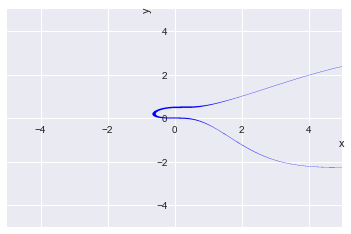

In [58]:
plot_implicit(Eq(f, 0))

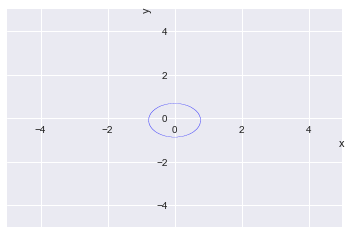

In [59]:
plot_implicit(Eq(g, 0))